In [1]:
!pip install librosa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename="C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/audio/dog.wav"

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

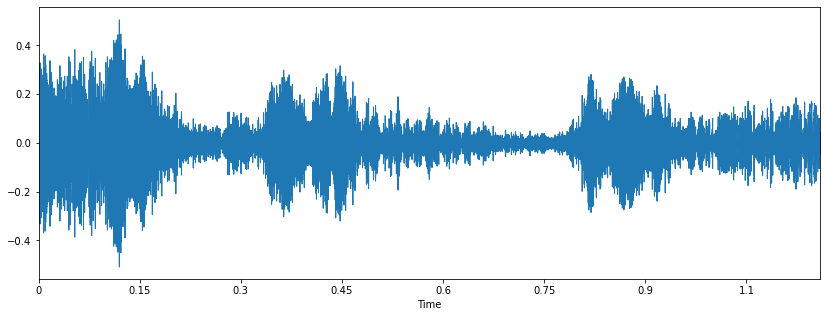

In [5]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

In [6]:
sample_rate

22050

In [7]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [8]:
wave_sample_rate

44100

In [9]:
wave_audio

array([[-875, 1142],
       [-925,  781],
       [-974,  412],
       ...,
       [1055, 1376],
       [1125, 1285],
       [1138, 1266]], dtype=int16)

In [10]:
data

array([ 0.00174507, -0.00765101, -0.02381957, ...,  0.0345374 ,
        0.03551649,  0.03890921], dtype=float32)

In [11]:
import pandas as pd
metadata = pd.read_csv("C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/metadata/UrbanSound8K.csv")
metadata.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
metadata['class'].value_counts()

jackhammer          1000
engine_idling       1000
dog_bark            1000
street_music        1000
drilling            1000
air_conditioner     1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [13]:
import librosa
audio_file_path = 'C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/audio/fold1/7061-6-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [14]:
print(librosa_audio_data)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0231203e-05 2.3116412e-05
 0.0000000e+00]


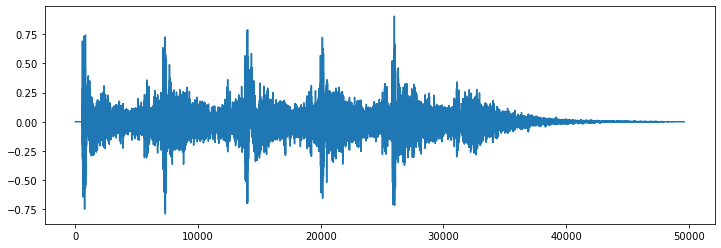

In [15]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
#orginal audio with 1 channel
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

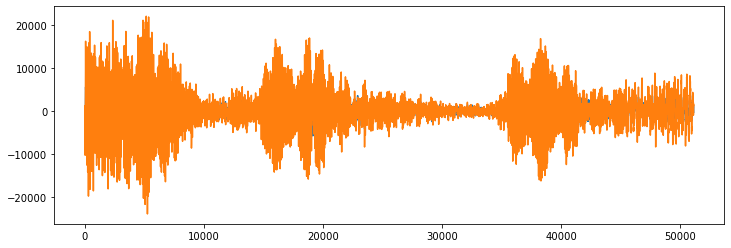

In [16]:
import matplotlib.pyplot as plt

#original audio with 2 channels
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [17]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate)
print(mfccs.shape)

(20, 97)


In [18]:
mfccs

array([[-9.38002014e+01,  7.49646759e+00,  1.54761038e+01, ...,
        -5.69353333e+02, -5.91727417e+02, -6.10556335e+02],
       [ 3.07740345e+01,  2.37197456e+01,  1.14163637e+01, ...,
         4.30511932e+01,  2.58881645e+01,  1.29275656e+01],
       [-3.28665137e+00, -1.20303555e+01, -1.50050745e+01, ...,
        -1.11037197e+01, -7.55049324e+00,  2.22121850e-01],
       ...,
       [ 4.29777050e+00,  3.89971352e+00,  3.38240433e+00, ...,
        -7.68894255e-01, -1.40343046e+00,  2.75599241e+00],
       [-4.04825211e+00, -3.85305452e+00, -1.47687054e+00, ...,
        -5.17491055e+00, -3.43511486e+00,  2.58401871e+00],
       [ 3.33109879e+00,  4.89331627e+00,  6.63633537e+00, ...,
         4.03766441e+00,  3.60766935e+00,  3.94774151e+00]], dtype=float32)

In [19]:
### Extracting MFCC's for every audio file
import pandas as pd
import os
import librosa
audio_dataset_path='C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/audio/'
metadata=pd.read_csv('C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [20]:
def features_extractor(file):
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

  return mfccs_scaled_features

In [21]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### Using mel-frequency cepstral coefficents
extracted_features=[]
for index_num, row in tqdm(metadata.iterrows()):
  file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
  final_class_labels = row["class"]
  data = features_extractor(file_name)
  extracted_features.append([data,final_class_labels])

3555it [06:55,  9.89it/s]C:\Users\User\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8324it [14:53, 13.61it/s]C:\Users\User\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8327it [14:53, 16.41it/s]C:\Users\User\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [15:31,  9.37it/s]


In [22]:
#converting extracted_features to pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [23]:
#split the dataset into dependent and independent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [24]:
X.shape

(8732, 40)

In [25]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [26]:
y.shape

(8732, 10)

In [27]:
##Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
X_train.shape

(6985, 40)

In [29]:
X_test.shape

(1747, 40)

In [30]:
y_train.shape

(6985, 10)

In [31]:
y_test.shape

(1747, 10)

In [32]:
!pip install tensorflow

In [33]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [34]:
#no of classes
num_labels=y.shape[1]

In [35]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [36]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [37]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size=32
checkpointer=ModelCheckpoint(filepath='C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/model/classi.hdf5',verbose=1,save_best_only=True)
start=datetime.now()
model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs, validation_data=(X_test, y_test),callbacks=[checkpointer])
duration=datetime.now()-start
print("Training Completed in time: ",duration)

Epoch 1/100
219/219 [==============================] - 3s 5ms/step - loss: 9.7632 - accuracy: 0.1194 - val_loss: 2.2887 - val_accuracy: 0.1156

Epoch 00001: val_loss improved from inf to 2.28871, saving model to C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/model\classi.hdf5
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 2.5141 - accuracy: 0.1301 - val_loss: 2.2827 - val_accuracy: 0.1076

Epoch 00002: val_loss improved from 2.28871 to 2.28273, saving model to C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/model\classi.hdf5
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3225 - accuracy: 0.1248 - val_loss: 2.2570 - val_accuracy: 0.1202

Epoch 00003: val_loss improved from 2.28273 to 2.25696, saving model to C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/model\classi.hdf5
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 2.2619 - accuracy: 0.1351 - val_

219/219 [==============================] - 1s 3ms/step - loss: 1.3161 - accuracy: 0.5509 - val_loss: 1.1035 - val_accuracy: 0.6365

Epoch 00028: val_loss improved from 1.12541 to 1.10353, saving model to C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/model\classi.hdf5
Epoch 29/100
219/219 [==============================] - 1s 3ms/step - loss: 1.2896 - accuracy: 0.5505 - val_loss: 1.0619 - val_accuracy: 0.6623

Epoch 00029: val_loss improved from 1.10353 to 1.06186, saving model to C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/model\classi.hdf5
Epoch 30/100
219/219 [==============================] - 1s 3ms/step - loss: 1.2845 - accuracy: 0.5519 - val_loss: 1.0597 - val_accuracy: 0.6617

Epoch 00030: val_loss improved from 1.06186 to 1.05966, saving model to C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/model\classi.hdf5
Epoch 31/100
219/219 [==============================] - 1s 3ms/step - loss: 1.2306 - accuracy: 0.5741 - val_loss:

219/219 [==============================] - 1s 2ms/step - loss: 1.0440 - accuracy: 0.6399 - val_loss: 0.8543 - val_accuracy: 0.7287

Epoch 00060: val_loss did not improve from 0.84611
Epoch 61/100
219/219 [==============================] - 1s 2ms/step - loss: 1.0513 - accuracy: 0.6411 - val_loss: 0.8676 - val_accuracy: 0.7224

Epoch 00061: val_loss did not improve from 0.84611
Epoch 62/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0378 - accuracy: 0.6440 - val_loss: 0.8466 - val_accuracy: 0.7361

Epoch 00062: val_loss did not improve from 0.84611
Epoch 63/100
219/219 [==============================] - 1s 2ms/step - loss: 1.0381 - accuracy: 0.6550 - val_loss: 0.8669 - val_accuracy: 0.7178

Epoch 00063: val_loss did not improve from 0.84611
Epoch 64/100
219/219 [==============================] - 1s 2ms/step - loss: 0.9948 - accuracy: 0.6624 - val_loss: 0.8343 - val_accuracy: 0.7189

Epoch 00064: val_loss improved from 0.84611 to 0.83434, saving model to C:/Users/Use

219/219 [==============================] - 1s 3ms/step - loss: 0.9637 - accuracy: 0.6722 - val_loss: 0.7579 - val_accuracy: 0.7693

Epoch 00096: val_loss improved from 0.75877 to 0.75789, saving model to C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/model\classi.hdf5
Epoch 97/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9336 - accuracy: 0.6852 - val_loss: 0.7727 - val_accuracy: 0.7602

Epoch 00097: val_loss did not improve from 0.75789
Epoch 98/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9695 - accuracy: 0.6691 - val_loss: 0.8163 - val_accuracy: 0.7470

Epoch 00098: val_loss did not improve from 0.75789
Epoch 99/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9579 - accuracy: 0.6670 - val_loss: 0.7443 - val_accuracy: 0.7659

Epoch 00099: val_loss improved from 0.75789 to 0.74430, saving model to C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/model\classi.hdf5
Epoch 100/100
219/219

In [43]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7595878839492798


In [45]:
filename="C:/Users/User/Downloads/Compressed/UrbanSound8K.tar/UrbanSound8K/audio/horn.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
from sklearn.preprocessing import LabelEncoder
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-138.54857      59.49066     -67.4054       12.183588    -31.804363
   -5.2327046   -11.385223      3.1439335   -21.304314     10.086853
  -24.625517     -6.4936028    -5.332599     10.502364      8.235439
   27.150549      5.9290886     3.4671652   -10.157667      5.9382386
   -5.559056     -9.421025    -14.691155      0.25299808    2.0143735
   -5.8296633    -8.203504     19.787985     21.795563     -6.5913706
  -28.173727     -1.2932948    25.993395     13.621144      0.18975218
    4.693284    -11.073293    -33.15743      -2.442647     31.61106   ]
[[-138.54857      59.49066     -67.4054       12.183588    -31.804363
    -5.2327046   -11.385223      3.1439335   -21.304314     10.086853
   -24.625517     -6.4936028    -5.332599     10.502364      8.235439
    27.150549      5.9290886     3.4671652   -10.157667      5.9382386
    -5.559056     -9.421025    -14.691155      0.25299808    2.0143735
    -5.8296633    -8.203504     19.787985     21.795563     -6.5913706
   -28.173727    

array(['car_horn'], dtype='<U16')